# Functions and Libraries:

In [17]:
%load_ext autoreload
%autoreload 2

import sys
import os

# https://stackoverflow.com/a/35273613 -> for how to import a local file in a notebook
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utilities.data_handling.pandas_reading import read_csv_file_with_pandas

from utilities.plotting.plot_customizer import PlotCustomizer

from utilities.generation.compton_form_factors import cff_Re_H, cff_Re_E, cff_Re_He, cff_DVCS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import Matplotlib and Numpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Read in the data:

In [3]:
jlab_pandas_df = read_csv_file_with_pandas('../data/jlab_kinematics.csv')

Some tests at extraction:

In [18]:
print(cff_Re_H(.57, 0.56))
print(cff_Re_E(.57, 0.56))
print(cff_Re_He(.57, 0.56))
print(cff_DVCS(.57, 0.56))

-3.1681950796142866
-0.31
-0.7313990103486496
0.09212497462965867


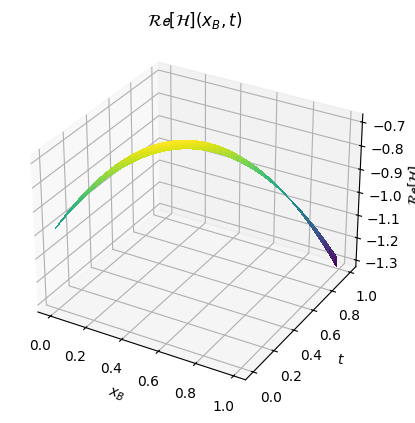

In [19]:
# (1): Figure instance:
figure = plt.figure()

# (2): Add an Axes Object:
axes_object = figure.add_subplot(111, projection = '3d')

# (3): Generate some x_{B} and t Values:
values_of_x_B = np.arange(0, 1, 0.01)
values_of_t = np.arange(0, 1, 0.01)
meshgrid_xb, meshgrid_t = np.meshgrid(values_of_x_B, values_of_t)

# (4): Plug into the CFFs:
cff_Re_H_z3 = cff_Re_H(meshgrid_xb, meshgrid_t)
cff_Re_E_z3 = cff_Re_E(meshgrid_xb, meshgrid_t)
cff_Re_He_z3 = cff_Re_He(meshgrid_xb, meshgrid_t)
cff_DVCS_z3 = cff_DVCS(meshgrid_xb, meshgrid_t)

# (4): Customize the Axes Object:
customizer = PlotCustomizer(
    axes_object,
    title = r"$\mathcal{Re} [ \mathcal{H} ] (x_{B}, t)$",
    xlabel = r"$x_{B}$",
    ylabel = r"$t$",
    zlabel = r"$\mathcal{Re} [ \mathcal{H} ]$",
    grid = True)

# (5): Add data to the Axes Object:
customizer.add_surface_plot(
    values_of_x_B,
    values_of_t,
    cff_Re_He_z3,
    colormap = 'viridis')

# customizer.add_surface_plot(
#     values_of_x_B,
#     values_of_t,
#     cff_Re_E_z3,
#     colormap = 'coolwarm')

# customizer.add_surface_plot(
#     values_of_x_B,
#     values_of_t,
#     cff_Re_He_z3,
#     colormap = 'Spectral')

# customizer.add_surface_plot(
#     values_of_x_B,
#     values_of_t,
#     cff_DVCS_z3,
#     colormap = 'seismic')